In [1]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import sys
sys.path.append('C:/Users/balay/Desktop/GL_method/Gregory-lorendo-Method')
from Oscilation_Detector import *
from Signalgenerator import *

In [21]:
FREQ = []
FFT = []
FFT_std = []
GL = []
GL_std = []
GP = []
GP_std = []
freq = 0.048
for i in range(25):
    FFT_t = []
    GL_t = []
    GP_t = []

    for m in range(5):
        generator = SignalGenerator(frequency= freq, time_range=170, random_seed=m,noise=0.05, asymmetry=0.1)
        data = generator.generate_impulsive_signal()
        pc = Oscilation_Detector(generator.data, w_min=0.015, w_max=0.060)
        pc.Compute_GP(resolution=50)
        pc.Compute_FFT()
        pc.Compute_GL(resolution=200)

        FFT_t.append(pc.fft_result)
        GP_t.append(pc.GP_result)
        GL_t.append(pc.GL_result)
    
    FFT.append(np.mean(FFT_t))
    FFT_std.append(np.std(FFT_t)) 
    GL.append(np.mean(GL_t))
    GL_std.append(np.std(GL_t))
    GP.append(np.mean(GP_t)) 
    GP_std.append(np.std(GP_t))  
    FREQ.append(freq)
    freq -= 0.001

c:\Users\balay\Anaconda3\envs\daml\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__periodicity is close to the specified lower bound 16.666666666666668. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\balay\Anaconda3\envs\daml\lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__periodicity is close to the specified upper bound 17.66766666666667. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\balay\Anaconda3\envs\daml\lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__periodicity is close to the specified upper bound 18.66766666666667. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\balay\Anaconda3

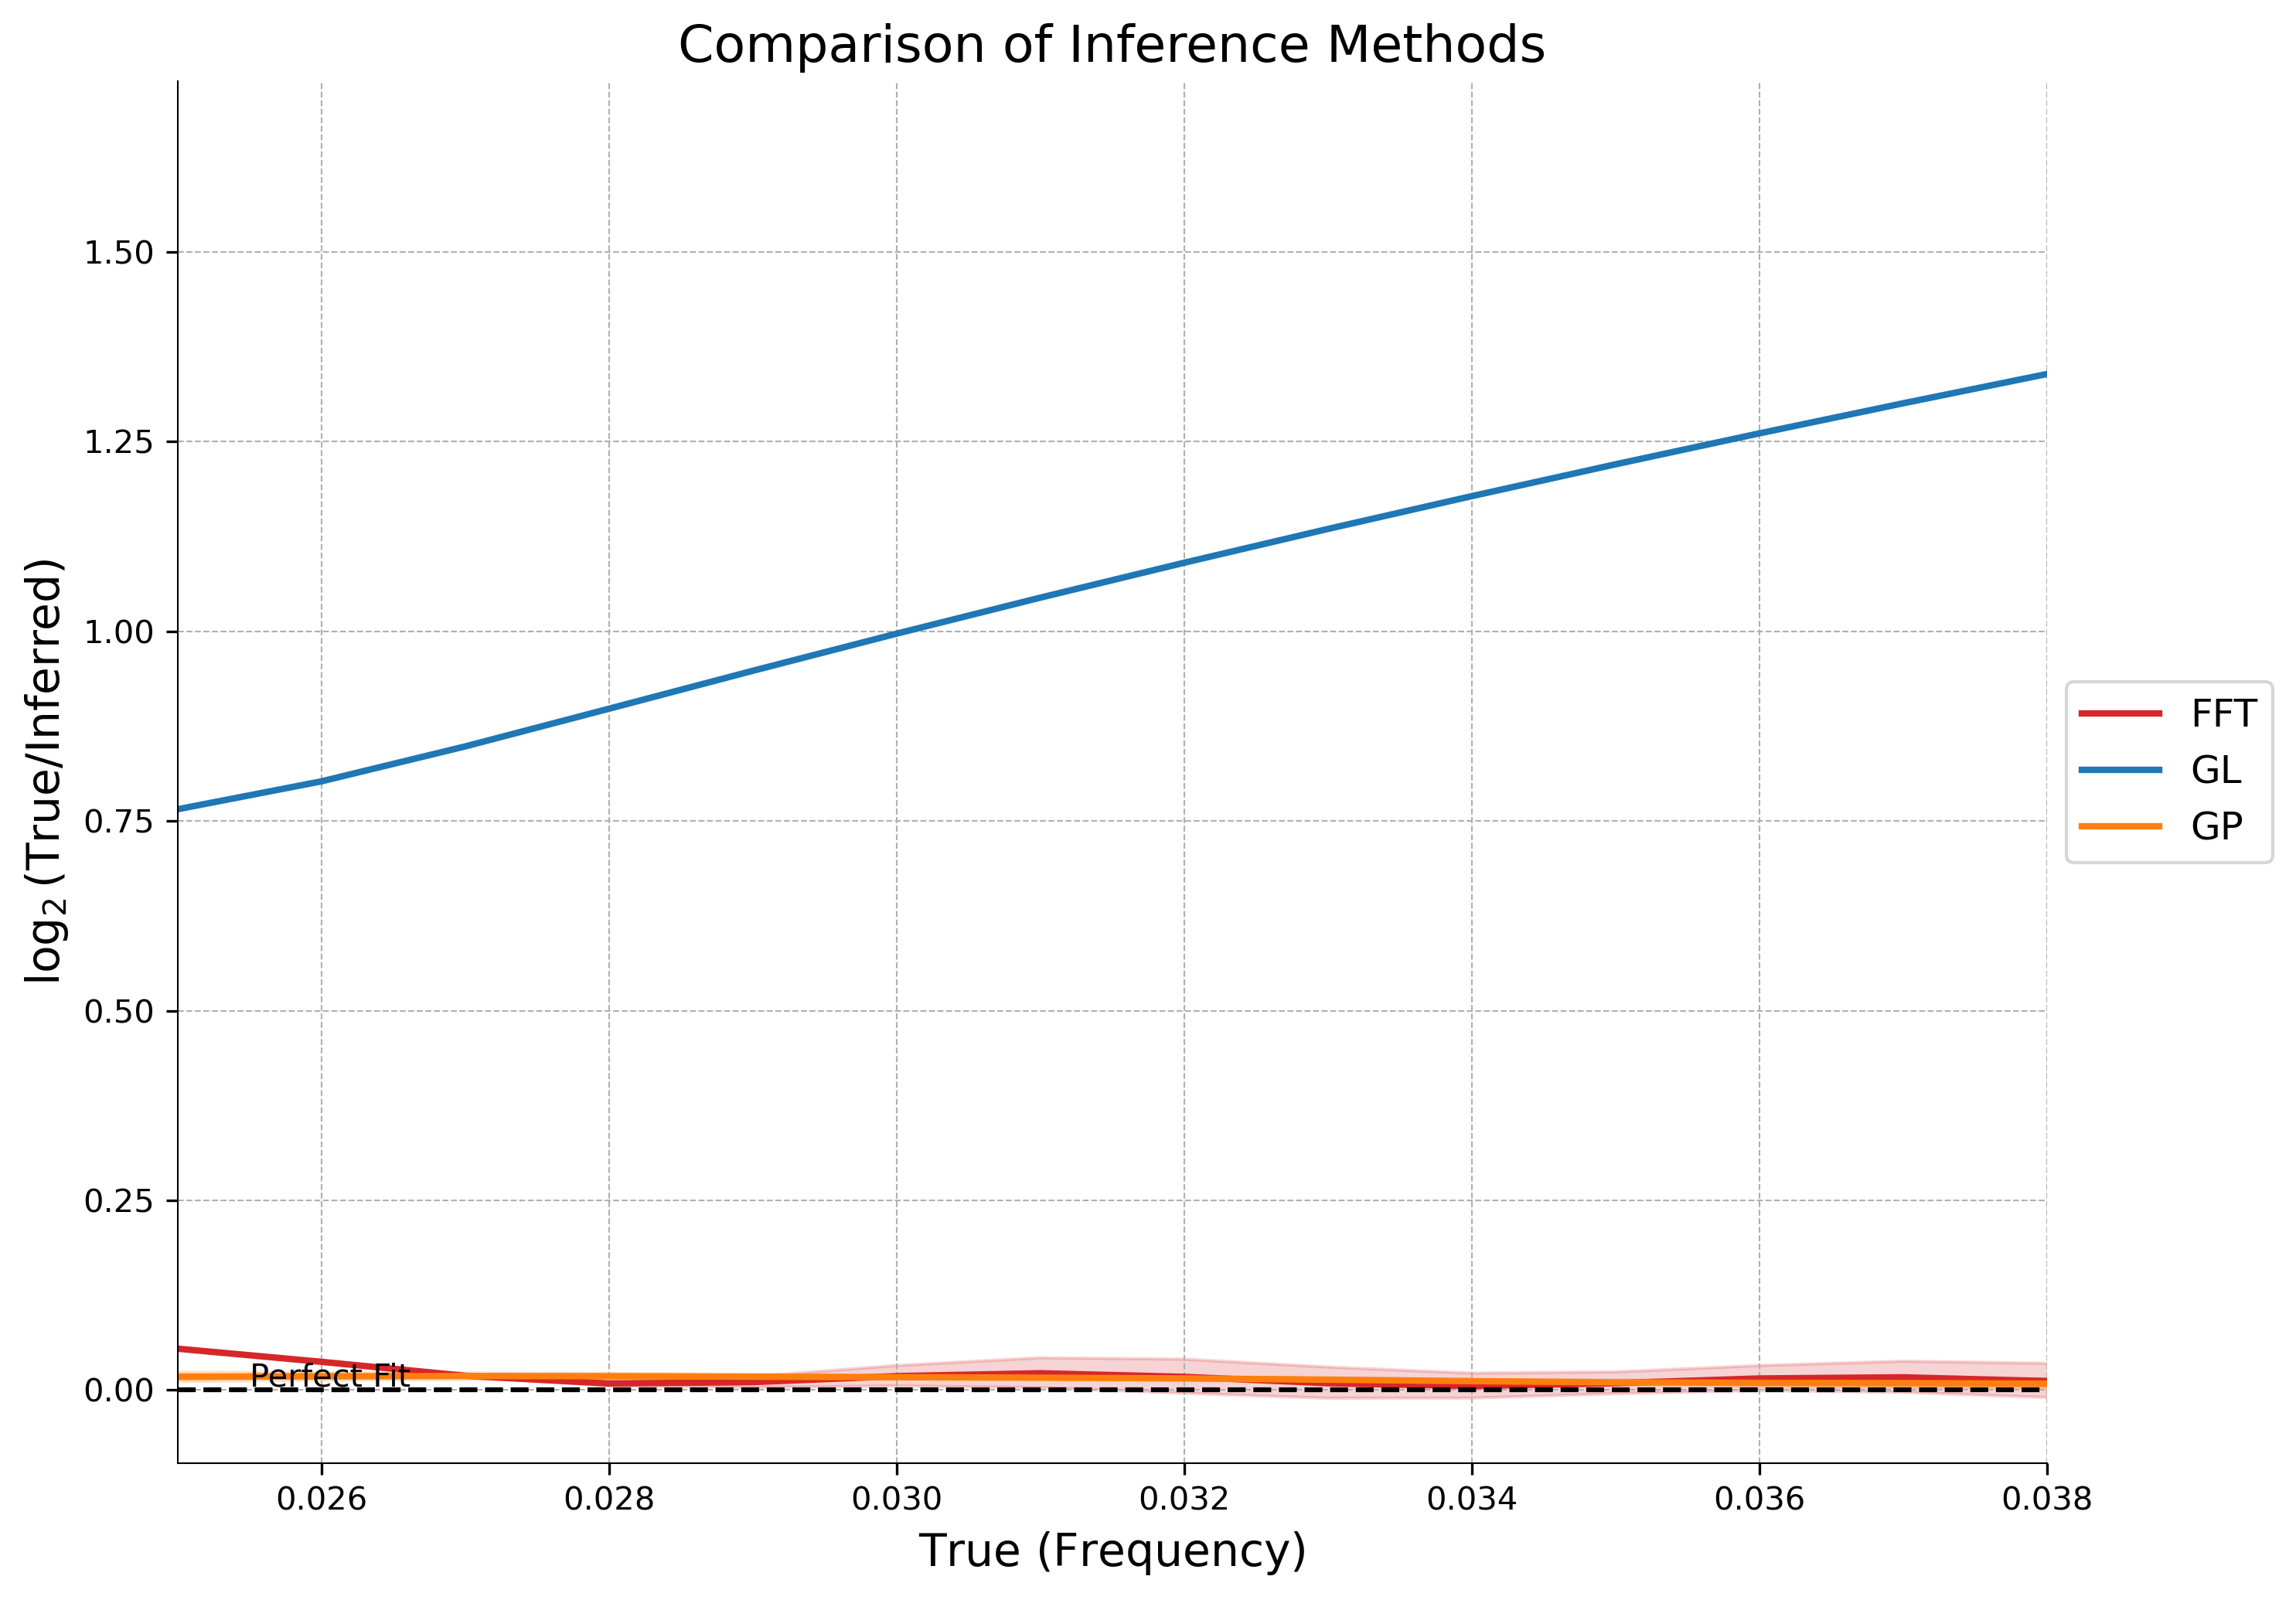

In [25]:
from scipy.ndimage import gaussian_filter1d

# Calculate log2(true/inferred) values
log2_ratio_1 = [np.log2(true/inf) for true, inf in zip(FREQ, FFT)]
log2_ratio_2 = [np.log2(true/inf) for true, inf in zip(FREQ, GL)]
log2_ratio_3 = [np.log2(true/inf) for true, inf in zip(FREQ, GP)]

# Calculate Upper and Lower bounds of inferred values
FFT_upper = [inf + std for inf, std in zip(FFT, FFT_std)]
FFT_lower = [inf - std for inf, std in zip(FFT, FFT_std)]

GL_upper = [inf + std for inf, std in zip(GL, GL_std)]
GL_lower = [inf - std for inf, std in zip(GL, GL_std)]

GP_upper = [inf + std for inf, std in zip(GP, GP_std)]
GP_lower = [inf - std for inf, std in zip(GP, GP_std)]

# Calculate log2 ratios for these bounds
log2_ratio_upper_1 = [np.log2(true/inf) for true, inf in zip(FREQ, FFT_upper)]
log2_ratio_lower_1 = [np.log2(true/inf) for true, inf in zip(FREQ, FFT_lower)]

log2_ratio_upper_2 = [np.log2(true/inf) for true, inf in zip(FREQ, GL_upper)]
log2_ratio_lower_2 = [np.log2(true/inf) for true, inf in zip(FREQ, GL_lower)]

log2_ratio_upper_3 = [np.log2(true/inf) for true, inf in zip(FREQ, GP_upper)]
log2_ratio_lower_3 = [np.log2(true/inf) for true, inf in zip(FREQ, GP_lower)]
# Apply Gaussian filter for smoothing
sigma = 2  # Adjust this value as needed to change the degree of smoothing

smoothed_log2_ratio_1 = gaussian_filter1d(log2_ratio_1, sigma)
smoothed_upper_1 = gaussian_filter1d(log2_ratio_upper_1, sigma)
smoothed_lower_1 = gaussian_filter1d(log2_ratio_lower_1, sigma)

smoothed_log2_ratio_2 = gaussian_filter1d(log2_ratio_2, sigma)
smoothed_upper_2 = gaussian_filter1d(log2_ratio_upper_2, sigma)
smoothed_lower_2 = gaussian_filter1d(log2_ratio_lower_2, sigma)

smoothed_log2_ratio_3 = gaussian_filter1d(log2_ratio_3, sigma)
smoothed_upper_3 = gaussian_filter1d(log2_ratio_upper_3, sigma)
smoothed_lower_3 = gaussian_filter1d(log2_ratio_lower_3, sigma)

# Plotting
plt.figure(figsize=(10, 7), dpi=300)  # High resolution
plt.rcParams["text.usetex"] = True  # Enable LaTeX

# Plotting the data with improved colors
colors = ['#d62728', '#1f77b4', '#ff7f0e']  # Red, Blue, Orange respectively for FFT, GL, GP
plt.rcParams["text.usetex"] = False

plt.plot(FREQ, smoothed_log2_ratio_1, color=colors[0], linewidth=2, label='FFT')
plt.fill_between(FREQ, smoothed_lower_1, smoothed_upper_1, color=colors[0], alpha=0.2)

plt.plot(FREQ, smoothed_log2_ratio_2, color=colors[1], linewidth=2, label='GL')
plt.fill_between(FREQ, smoothed_lower_2, smoothed_upper_2, color=colors[1], alpha=0.2)

plt.plot(FREQ, smoothed_log2_ratio_3, color=colors[2], linewidth=2, label='GP')
plt.fill_between(FREQ, smoothed_lower_3, smoothed_upper_3, color=colors[2], alpha=0.2)

plt.axhline(0, color='black', linewidth=1.5, linestyle='--')
plt.annotate('Perfect Fit', xy=(0.0255, 0.005), fontsize=10, color='black')  # Adjust the xy values to position the label as needed

plt.xlabel(r"True ($\mathrm{Frequency}$)", fontsize=14)
plt.xlim(0.025, 0.038)
#plt.ylim(-0.05, 0.05)
plt.ylabel(r"$\log_2(\mathrm{True/Inferred})$", fontsize=14)
plt.title("Comparison of Inference Methods", fontsize=16)


# Improving grid and spines
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)

# Legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

plt.tight_layout()
plt.show()


In [26]:
Impulsive_frequency_analysis = pd.DataFrame({
    'frequency': FREQ,
    'FFT': FFT,
    'FFT_std': FFT_std,
    'GL': GL,
    'GL_std'  : GL_std,
    'GP' : GP,
    'GP_std' : GP_std
})

In [27]:
# Saving the DataFrame to a CSV file in the same directory
Impulsive_frequency_analysis.to_csv("Impulsive_frequency_analysis.csv", index=False)

# With Time Range

In [31]:
Time_range = []
FFT = []
FFT_std = []
GL = []
GL_std = []
GP = []
GP_std = []
time = 250
for i in range(25):
    FFT_t = []
    GL_t = []
    GP_t = []

    for m in range(5):
        generator = SignalGenerator(time_range=time, random_seed=m, noise=0.05, asymmetry=0.1)
        data = generator.generate_impulsive_signal()
        pc = Oscilation_Detector(generator.data, w_min=0.025, w_max=0.050)
        pc.Compute_GP(resolution=50)
        pc.Compute_FFT()
        pc.Compute_GL(resolution=200)

        FFT_t.append(pc.fft_result)
        GP_t.append(pc.GP_result)
        GL_t.append(pc.GL_result)
    
    FFT.append(np.mean(FFT_t))
    FFT_std.append(np.std(FFT_t)) 
    GL.append(np.mean(GL_t))
    GL_std.append(np.std(GL_t))
    GP.append(np.mean(GP_t)) 
    GP_std.append(np.std(GP_t))  
    Time_range.append(time)
    time -= 10

c:\Users\balay\Anaconda3\envs\daml\lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__periodicity is close to the specified upper bound 20.001. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\balay\Anaconda3\envs\daml\lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\balay\Anaconda3\envs\daml\lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__periodicity is close to the specified upper bound 20.401. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\balay\Anaconda3\envs\daml\lib\site-packages\sk

ValueError: All-NaN slice encountered

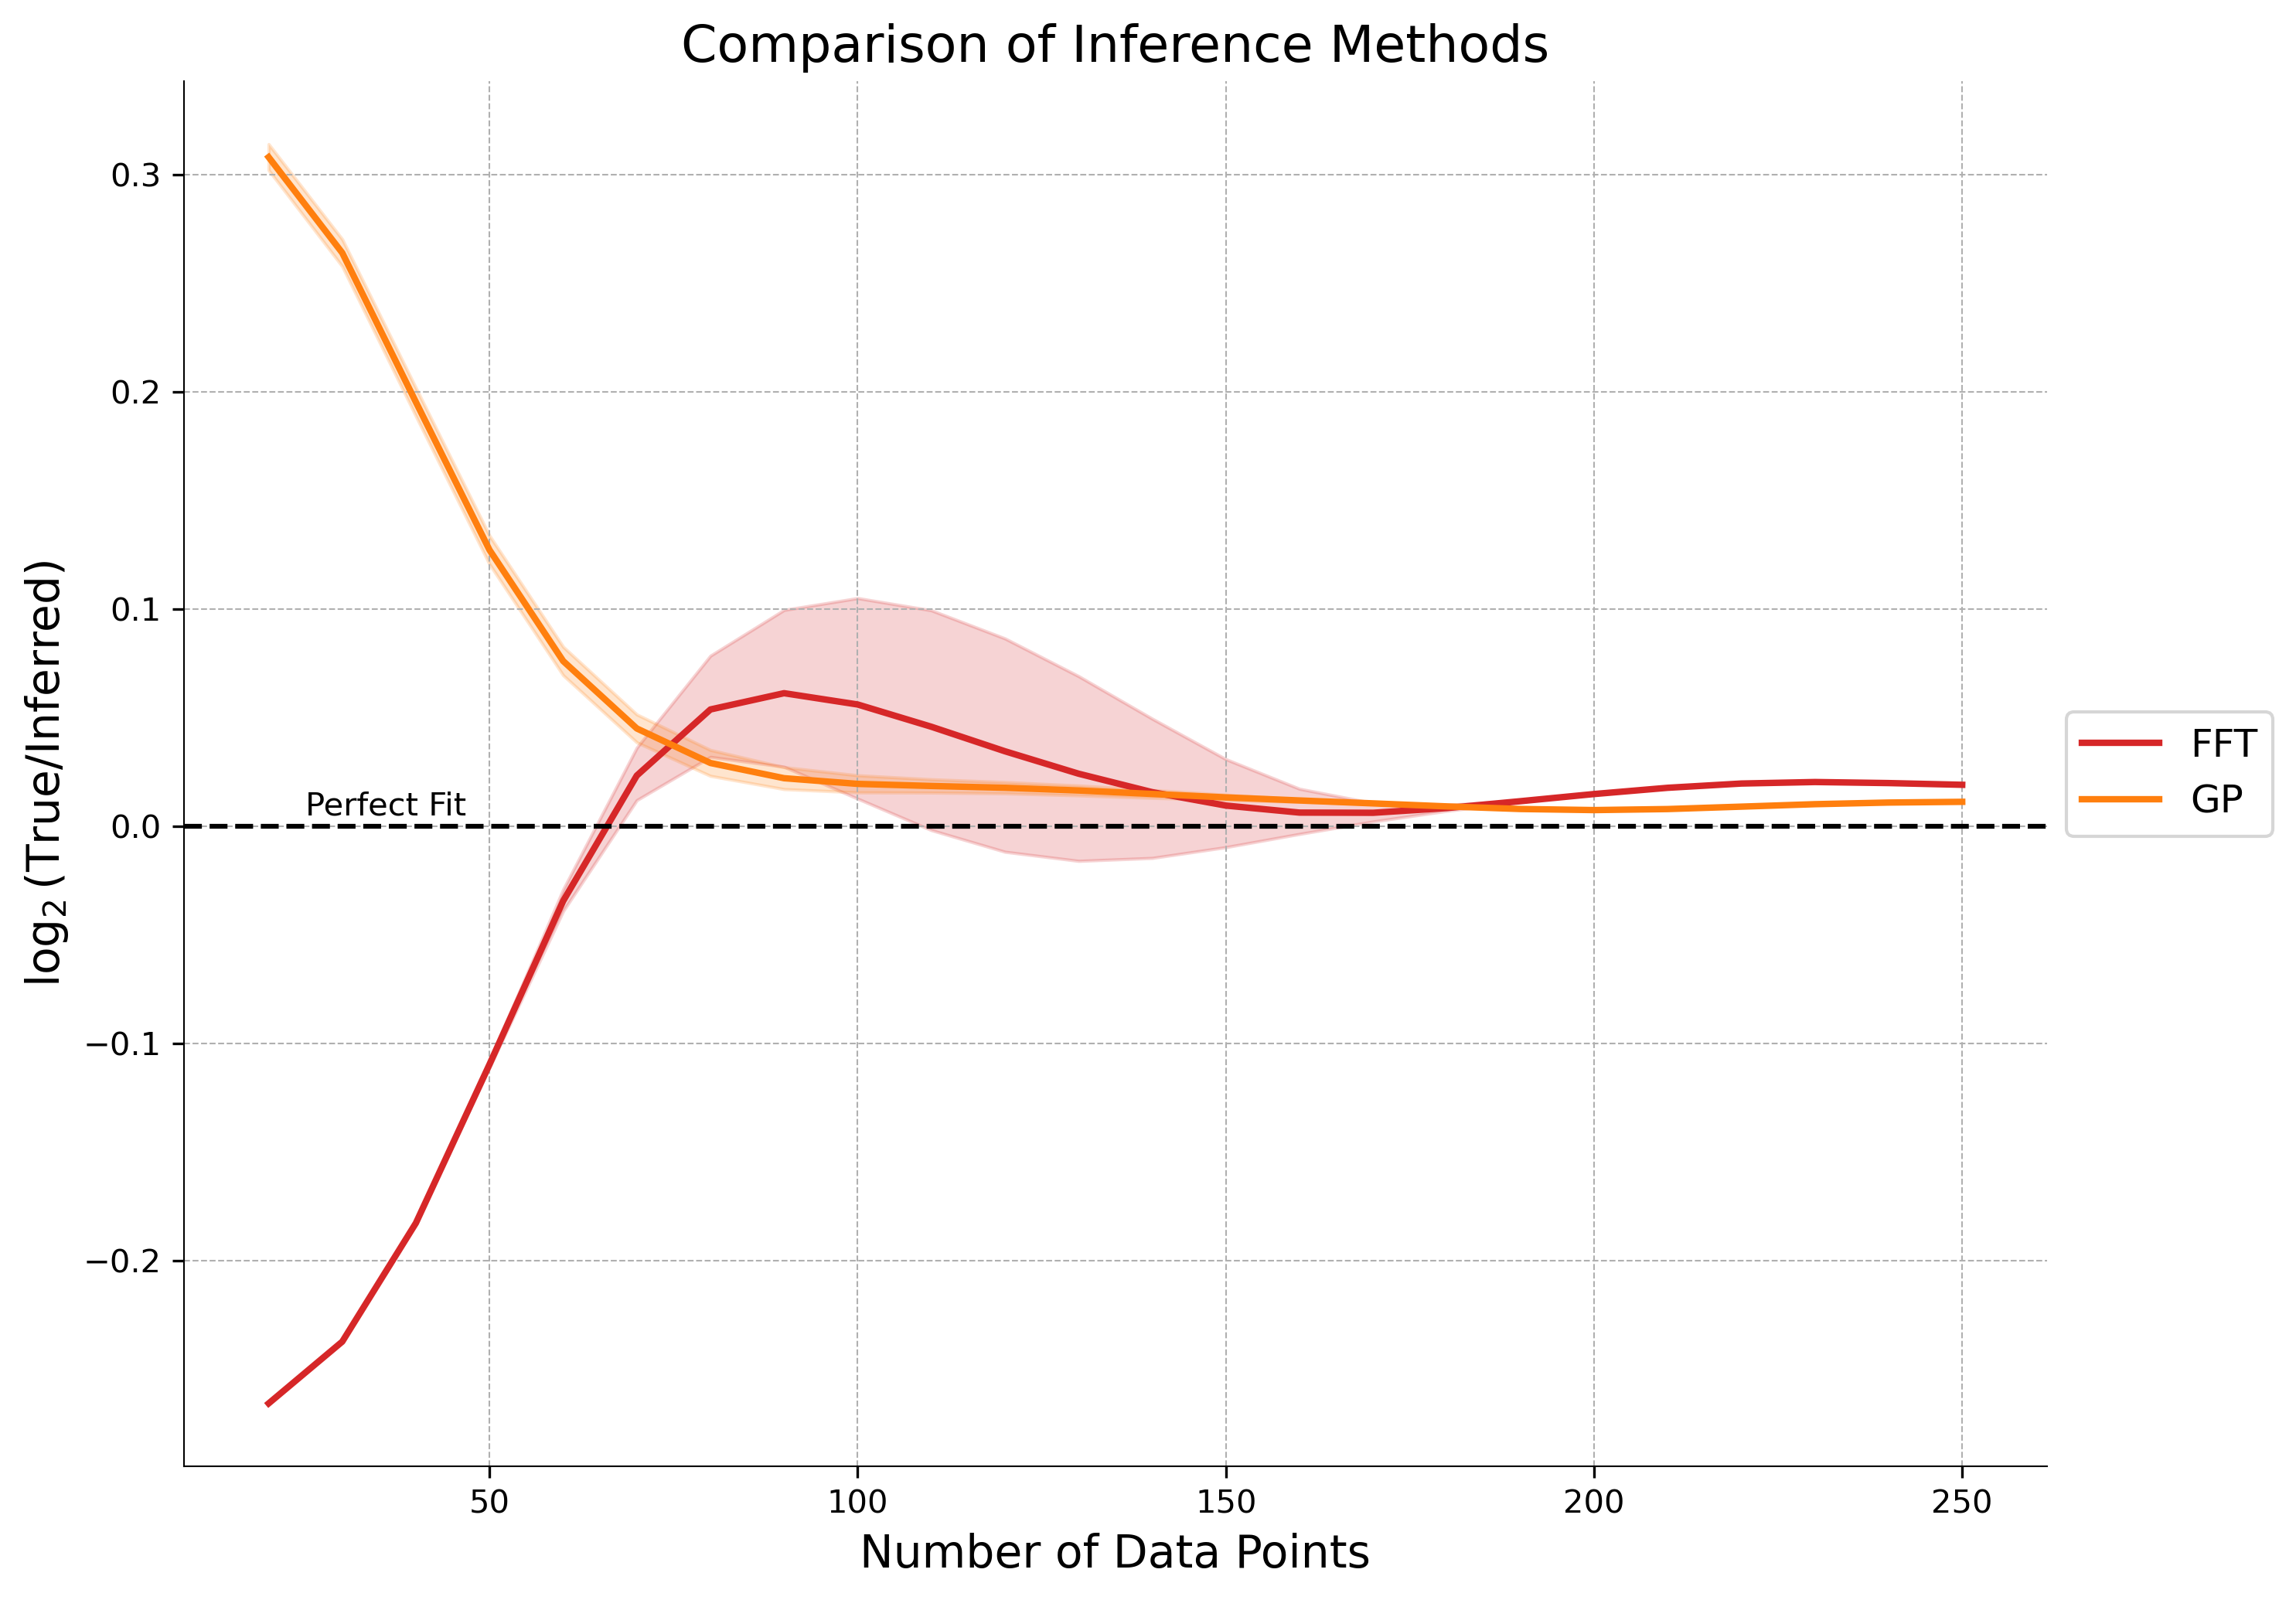

In [33]:
#Calculate log2(true/inferred) values
log2_ratio_1 = [np.log2(0.035/inf) for  inf in FFT]
log2_ratio_2 = [np.log2(0.035/inf) for  inf in  GL]
log2_ratio_3 = [np.log2(0.035/inf) for  inf in  GP]

# Calculate Upper and Lower bounds of inferred values
FFT_upper = [inf + std for inf, std in zip(FFT, FFT_std)]
FFT_lower = [inf - std for inf, std in zip(FFT, FFT_std)]

GL_upper = [inf + std for inf, std in zip(GL, GL_std)]
GL_lower = [inf - std for inf, std in zip(GL, GL_std)]

GP_upper = [inf + std for inf, std in zip(GP, GP_std)]
GP_lower = [inf - std for inf, std in zip(GP, GP_std)]

# Calculate log2 ratios for these bounds
log2_ratio_upper_1 = [np.log2(0.035/inf) for inf in FFT_upper]
log2_ratio_lower_1 = [np.log2(0.035/inf) for  inf in  FFT_lower]

log2_ratio_upper_2 = [np.log2(0.035/inf) for  inf in  GL_upper]
log2_ratio_lower_2 = [np.log2(0.035/inf) for  inf in  GL_lower]

log2_ratio_upper_3 = [np.log2(0.035/inf) for  inf in  GP_upper]
log2_ratio_lower_3 = [np.log2(0.035/inf) for  inf in  GP_lower]
# Apply Gaussian filter for smoothing
sigma = 2  # Adjust this value as needed to change the degree of smoothing

smoothed_log2_ratio_1 = gaussian_filter1d(log2_ratio_1, sigma)
smoothed_upper_1 = gaussian_filter1d(log2_ratio_upper_1, sigma)
smoothed_lower_1 = gaussian_filter1d(log2_ratio_lower_1, sigma)

smoothed_log2_ratio_2 = gaussian_filter1d(log2_ratio_2, sigma)
smoothed_upper_2 = gaussian_filter1d(log2_ratio_upper_2, sigma)
smoothed_lower_2 = gaussian_filter1d(log2_ratio_lower_2, sigma)

smoothed_log2_ratio_3 = gaussian_filter1d(log2_ratio_3, sigma)
smoothed_upper_3 = gaussian_filter1d(log2_ratio_upper_3, sigma)
smoothed_lower_3 = gaussian_filter1d(log2_ratio_lower_3, sigma)

# Plotting
plt.figure(figsize=(10, 7), dpi=300)  # High resolution
plt.rcParams["text.usetex"] = True  # Enable LaTeX

# Plotting the data with improved colors
colors = ['#d62728', '#1f77b4', '#ff7f0e']  # Red, Blue, Orange respectively for FFT, GL, GP
plt.rcParams["text.usetex"] = False

plt.plot(Time_range, smoothed_log2_ratio_1, color=colors[0], linewidth=2, label='FFT')
plt.fill_between(Time_range, smoothed_lower_1, smoothed_upper_1, color=colors[0], alpha=0.2)

#plt.plot(Time_range, smoothed_log2_ratio_2, color=colors[1], linewidth=2, label='GL')
#plt.fill_between(Time_range, smoothed_lower_2, smoothed_upper_2, color=colors[1], alpha=0.2)

plt.plot(Time_range, smoothed_log2_ratio_3, color=colors[2], linewidth=2, label='GP')
plt.fill_between(Time_range, smoothed_lower_3, smoothed_upper_3, color=colors[2], alpha=0.2)

plt.axhline(0, color='black', linewidth=1.5, linestyle='--')
plt.annotate('Perfect Fit', xy=(25, 0.005), fontsize=10, color='black')  # Adjust the xy values to position the label as needed

plt.xlabel(r"Number of Data Points", fontsize=14)
#plt.xlim(0.025, 0.038)
#plt.ylim(-0.05, 0.05)
plt.ylabel(r"$\log_2(\mathrm{True/Inferred})$", fontsize=14)
plt.title("Comparison of Inference Methods", fontsize=16)


# Improving grid and spines
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)

# Legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

plt.tight_layout()
plt.show()

In [34]:
Impulsive_datapoints_analysis = pd.DataFrame({
    'no_data_points': Time_range,
    'FFT': FFT,
    'FFT_std': FFT_std,
    'GL': GL,
    'GL_std'  : GL_std,
    'GP' : GP,
    'GP_std' : GP_std
})

In [35]:
# Saving the DataFrame to a CSV file in the same directory
Impulsive_datapoints_analysis.to_csv("Impulsive_datapoints_analysis.csv", index=False)

# With Noise

In [36]:
Noise = []
FFT = []
FFT_std = []
GL = []
GL_std = []
GP = []
GP_std = []
noise = 0.05
for i in range(22):
    FFT_t = []
    GL_t = []
    GP_t = []

    for m in range(5):
        generator = SignalGenerator(random_seed=m, noise=noise, asymmetry=0.1)
        data = generator.generate_impulsive_signal()
        pc = Oscilation_Detector(generator.data, w_min=0.025, w_max=0.050)
        pc.Compute_GP(resolution=50)
        pc.Compute_FFT()
        pc.Compute_GL(resolution=200)

        FFT_t.append(pc.fft_result)
        GP_t.append(pc.GP_result)
        GL_t.append(pc.GL_result)
    
    FFT.append(np.mean(FFT_t))
    FFT_std.append(np.std(FFT_t)) 
    GL.append(np.mean(GL_t))
    GL_std.append(np.std(GL_t))
    GP.append(np.mean(GP_t)) 
    GP_std.append(np.std(GP_t))  
    Noise.append(noise)
    noise -= 0.005

c:\Users\balay\Anaconda3\envs\daml\lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__periodicity is close to the specified upper bound 20.001. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\balay\Anaconda3\envs\daml\lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__periodicity is close to the specified upper bound 20.401. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\balay\Anaconda3\envs\daml\lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__periodicity is close to the specified upper bound 20.801. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\balay\Anaconda3\envs\daml\lib\site-packages\sklea

ValueError: scale < 0

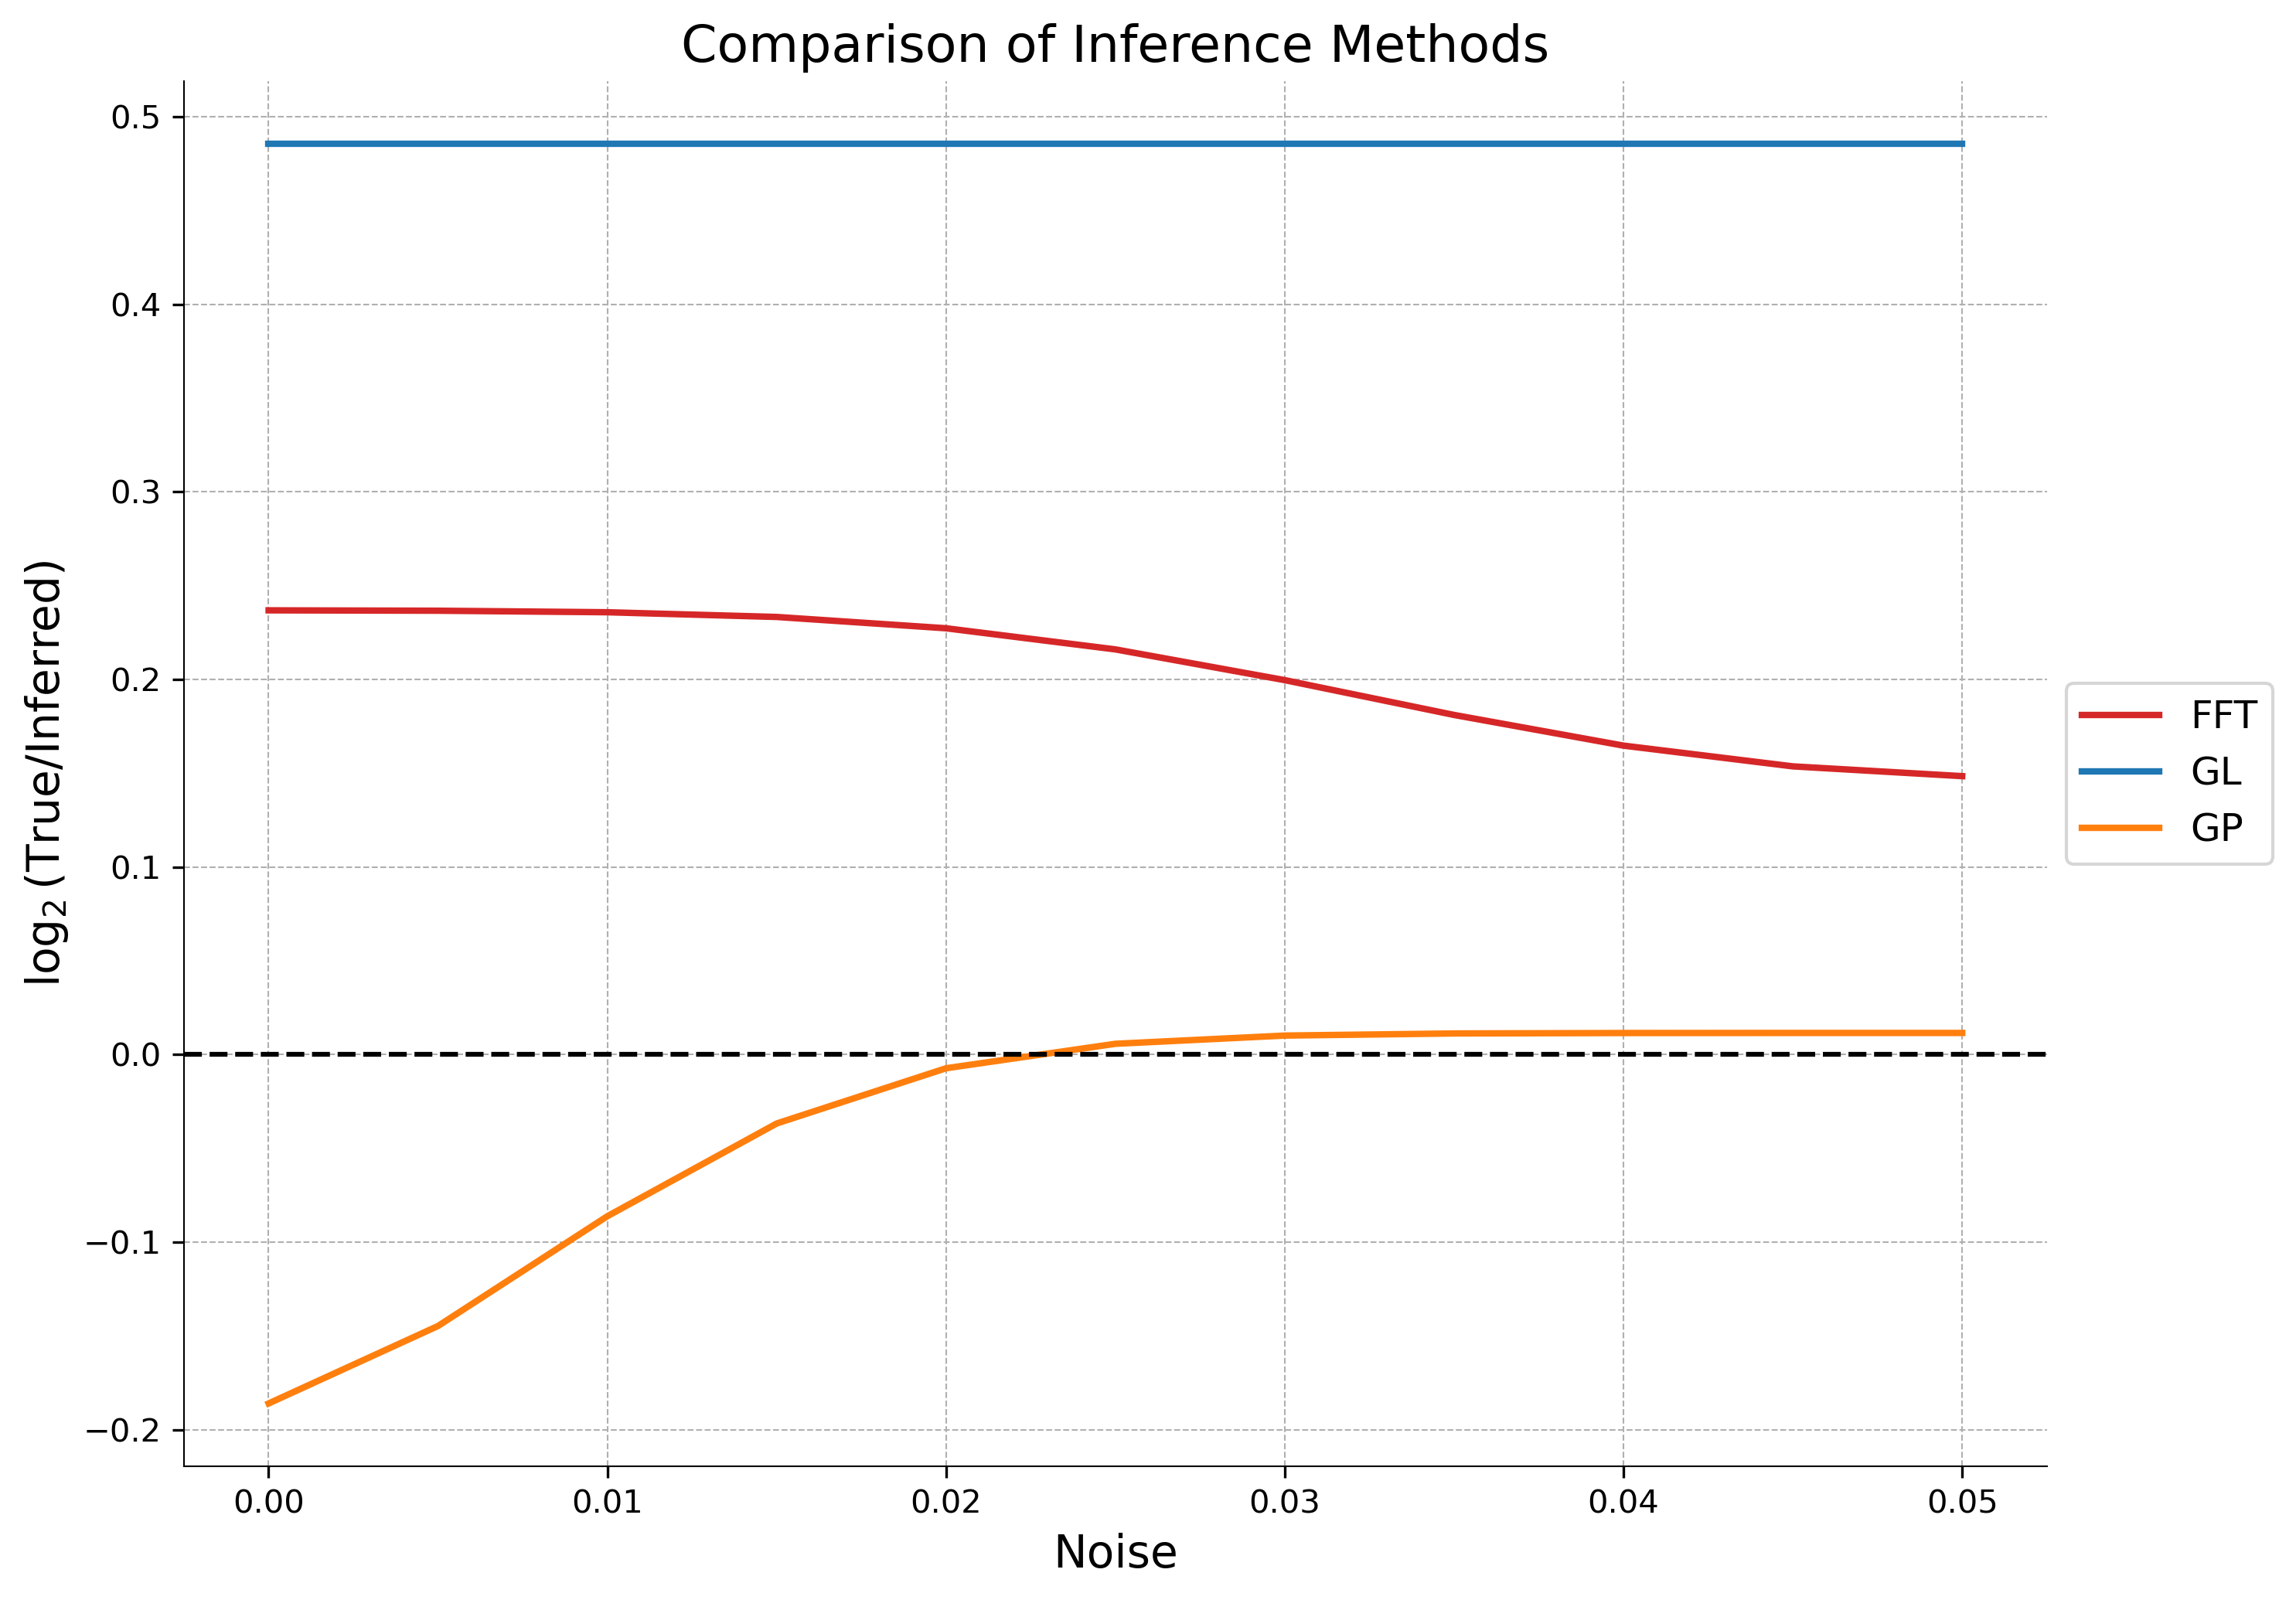

In [37]:
# Calculate log2(true/inferred) values
log2_ratio_1 = [np.log2(0.035/inf) for  inf in FFT]
log2_ratio_2 = [np.log2(0.035/inf) for  inf in  GL]
log2_ratio_3 = [np.log2(0.035/inf) for  inf in  GP]

# Calculate Upper and Lower bounds of inferred values
FFT_upper = [inf + std for inf, std in zip(FFT, FFT_std)]
FFT_lower = [inf - std for inf, std in zip(FFT, FFT_std)]

GL_upper = [inf + std for inf, std in zip(GL, GL_std)]
GL_lower = [inf - std for inf, std in zip(GL, GL_std)]

GP_upper = [inf + std for inf, std in zip(GP, GP_std)]
GP_lower = [inf - std for inf, std in zip(GP, GP_std)]

# Calculate log2 ratios for these bounds
log2_ratio_upper_1 = [np.log2(0.035/inf) for inf in FFT_upper]
log2_ratio_lower_1 = [np.log2(0.035/inf) for  inf in  FFT_lower]

log2_ratio_upper_2 = [np.log2(0.035/inf) for  inf in  GL_upper]
log2_ratio_lower_2 = [np.log2(0.035/inf) for  inf in  GL_lower]

log2_ratio_upper_3 = [np.log2(0.035/inf) for  inf in  GP_upper]
log2_ratio_lower_3 = [np.log2(0.035/inf) for  inf in  GP_lower]
# Apply Gaussian filter for smoothing
sigma = 2  # Adjust this value as needed to change the degree of smoothing

smoothed_log2_ratio_1 = gaussian_filter1d(log2_ratio_1, sigma)
smoothed_upper_1 = gaussian_filter1d(log2_ratio_upper_1, sigma)
smoothed_lower_1 = gaussian_filter1d(log2_ratio_lower_1, sigma)

smoothed_log2_ratio_2 = gaussian_filter1d(log2_ratio_2, sigma)
smoothed_upper_2 = gaussian_filter1d(log2_ratio_upper_2, sigma)
smoothed_lower_2 = gaussian_filter1d(log2_ratio_lower_2, sigma)

smoothed_log2_ratio_3 = gaussian_filter1d(log2_ratio_3, sigma)
smoothed_upper_3 = gaussian_filter1d(log2_ratio_upper_3, sigma)
smoothed_lower_3 = gaussian_filter1d(log2_ratio_lower_3, sigma)

# Plotting
plt.figure(figsize=(10, 7), dpi=300)  # High resolution
plt.rcParams["text.usetex"] = True  # Enable LaTeX

# Plotting the data with improved colors
colors = ['#d62728', '#1f77b4', '#ff7f0e']  # Red, Blue, Orange respectively for FFT, GL, GP
plt.rcParams["text.usetex"] = False

plt.plot(Noise, smoothed_log2_ratio_1, color=colors[0], linewidth=2, label='FFT')
#plt.fill_between(Noise, smoothed_lower_1, smoothed_upper_1, color=colors[0], alpha=0.2)

plt.plot(Noise, smoothed_log2_ratio_2, color=colors[1], linewidth=2, label='GL')
plt.fill_between(Noise, smoothed_lower_2, smoothed_upper_2, color=colors[1], alpha=0.2)

plt.plot(Noise, smoothed_log2_ratio_3, color=colors[2], linewidth=2, label='GP')
plt.fill_between(Noise, smoothed_lower_3, smoothed_upper_3, color=colors[2], alpha=0.2)

plt.axhline(0, color='black', linewidth=1.5, linestyle='--')
plt.annotate('Perfect Fit', xy=(25, 0.005), fontsize=10, color='black')  # Adjust the xy values to position the label as needed

plt.xlabel(r"Noise", fontsize=14)
#plt.xlim(0.025, 0.038)
#plt.ylim(-0.05, 0.05)
plt.ylabel(r"$\log_2(\mathrm{True/Inferred})$", fontsize=14)
plt.title("Comparison of Inference Methods", fontsize=16)


# Improving grid and spines
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)

# Legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

plt.tight_layout()
plt.show()

In [38]:
Impulsive_Noise_analysis = pd.DataFrame({
    'Noise': Noise,
    'FFT': FFT,
    'FFT_std': FFT_std,
    'GL': GL,
    'GL_std'  : GL_std,
    'GP' : GP,
    'GP_std' : GP_std
})

In [39]:
# Saving the DataFrame to a CSV file in the same directory
Impulsive_Noise_analysis.to_csv("Impulsive_Noise_analysis.csv", index=False)